# OpenAI API

Accuracy: 1.0
F1 Score: 1.0
MLflow Tracking URI: file:///Users/mlev/Documents/DATA/mlflow/mlruns


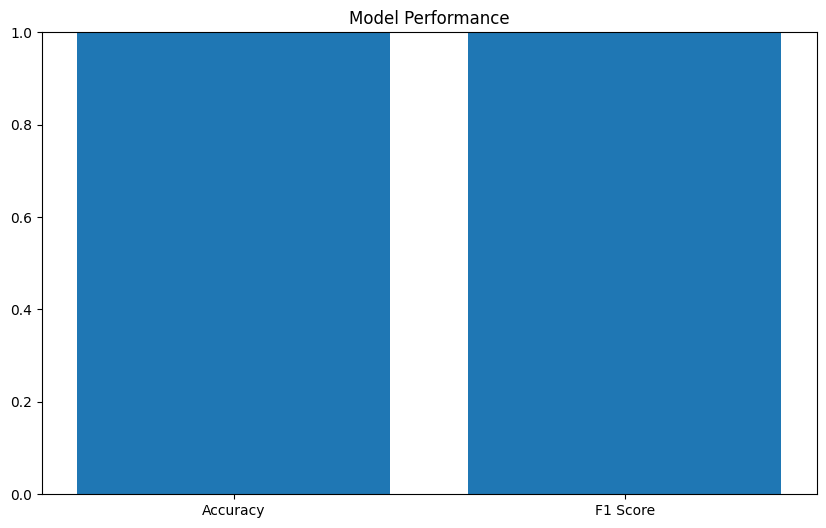

In [1]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Charger le dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Définir les paramètres du modèle
n_estimators = 100
max_depth = 5

# Commencer une expérience MLflow
mlflow.set_experiment("Iris Classification")

with mlflow.start_run():
    # Enregistrer les paramètres
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    
    # Créer et entraîner le modèle
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    
    # Faire des prédictions
    y_pred = rf.predict(X_test)
    
    # Calculer les métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Enregistrer les métriques
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    
    # Créer un exemple d'entrée
    input_example = X_train[0].reshape(1, -1)
    
    # Enregistrer le modèle avec une signature et un exemple d'entrée
    signature = mlflow.models.infer_signature(X_train, y_pred)
    mlflow.sklearn.log_model(rf, "random_forest_model", signature=signature, input_example=input_example)
    
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    
    # Enregistrer un graphique (facultatif)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.bar(['Accuracy', 'F1 Score'], [accuracy, f1])
    plt.title('Model Performance')
    plt.ylim(0, 1)
    mlflow.log_artifact("performance.png")

print(f"MLflow Tracking URI: {mlflow.get_tracking_uri()}")

In [2]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X, y = make_classification(random_state=42, n_features=5)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Définir les paramètres du modèle
n_neighbors = 3
leaf_size = 30

# Commencer une expérience MLflow
mlflow.set_experiment("Random Classification with KNN")

with mlflow.start_run():
    # Enregistrer les paramètres
    mlflow.log_param("n_neighbors", n_neighbors)
    mlflow.log_param("leaf_size", leaf_size)
    
    # Créer et entraîner le modèle
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, leaf_size = leaf_size)
    knn.fit(X_train, y_train)
    
    # Faire des prédictions
    y_pred = knn.predict(X_test)
    
    # Calculer les métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Enregistrer les métriques
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    
    # Créer un exemple d'entrée
    input_example = X_train[0].reshape(1, -1)
    
    # Enregistrer le modèle avec une signature et un exemple d'entrée
    signature = mlflow.models.infer_signature(X_train, y_pred)
    mlflow.sklearn.log_model(knn, "KNN", signature=signature, input_example=input_example)
    
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")

print(f"MLflow Tracking URI: {mlflow.get_tracking_uri()}")

Accuracy: 1.0
F1 Score: 1.0
MLflow Tracking URI: file:///Users/mlev/Documents/DATA/mlflow/mlruns
